# Fu-Predictor
### Data Cleaning
by fujyn

---

### Usage

The goal of this notebook is to clean nba data :

- Explore datasets
- Format Data
- Create a formated dataset into a csv file
- Check formated dataset

---
## Package import

In [1]:
# Import default library
import numpy as np
import pandas as pd

# for Generator
from scipy import stats # for sampling
import copy # for copying nested dictionaries

import matplotlib.pyplot as plt  # for visualization 
import seaborn as sns  # for coloring 

---

# Analyzis and Data cleaning


### Games dataset overview

In [2]:
df = pd.read_csv('../data/games.csv')
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-05-04,42100202,Final,1610612748,1610612755,2021,1610612748,119.0,0.513,0.806,...,25.0,44.0,1610612755,103.0,0.452,0.864,0.267,17.0,34.0,1
1,2022-05-04,42100222,Final,1610612756,1610612742,2021,1610612756,129.0,0.645,0.857,...,28.0,34.0,1610612742,109.0,0.456,0.833,0.415,19.0,25.0,1
2,2022-05-03,42100212,Final,1610612738,1610612749,2021,1610612738,109.0,0.475,0.867,...,28.0,40.0,1610612749,86.0,0.466,0.652,0.167,16.0,37.0,1
3,2022-05-03,42100232,Final,1610612763,1610612744,2021,1610612763,106.0,0.396,0.952,...,17.0,49.0,1610612744,101.0,0.421,0.778,0.184,27.0,52.0,1
4,2022-05-02,42100201,Final,1610612748,1610612755,2021,1610612748,106.0,0.435,0.944,...,21.0,47.0,1610612755,92.0,0.430,0.900,0.176,18.0,37.0,1


---
### Clean dataset for fit to preformating

In [3]:
# Sort games dataframe by date
df = df.sort_values(by='GAME_DATE_EST').reset_index(drop=True)

# Drop empty entries, games data before 2003 contains NaN
df = df.loc[df['GAME_DATE_EST'] >= "2004-10-28"].reset_index(drop=True)

# Check if there is some null values
df.isnull().values.any()

False

In [4]:
df.isna().sum().sum()

0

### Clean ranking dataset

In [29]:
rf = pd.read_csv('../data/ranking.csv')
rf.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612756,0,22021,2022-05-04,West,Phoenix,82,64,18,0.780,32-9,32-9,NaN
1,1610612763,0,22021,2022-05-04,West,Memphis,82,56,26,0.683,30-11,26-15,NaN
2,1610612744,0,22021,2022-05-04,West,Golden State,82,53,29,0.646,31-10,22-19,NaN
3,1610612742,0,22021,2022-05-04,West,Dallas,82,52,30,0.634,29-12,23-18,NaN
4,1610612762,0,22021,2022-05-04,West,Utah,82,49,33,0.598,29-12,20-21,NaN


In [30]:
# Sort games dataframe by date
rf = rf.sort_values(by='STANDINGSDATE').reset_index(drop=True)

rf = rf.drop(columns='RETURNTOPLAY')

# Drop empty entries, games data before 2003 contains NaN
rf = rf.loc[rf['STANDINGSDATE'] >= "2004-10-28"].reset_index(drop=True)

# Check if there is some null values
rf.isnull().values.any()

False

In [31]:
rf.isna().sum().sum()

0

In [32]:
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191969 entries, 0 to 191968
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TEAM_ID        191969 non-null  int64  
 1   LEAGUE_ID      191969 non-null  int64  
 2   SEASON_ID      191969 non-null  int64  
 3   STANDINGSDATE  191969 non-null  object 
 4   CONFERENCE     191969 non-null  object 
 5   TEAM           191969 non-null  object 
 6   G              191969 non-null  int64  
 7   W              191969 non-null  int64  
 8   L              191969 non-null  int64  
 9   W_PCT          191969 non-null  float64
 10  HOME_RECORD    191969 non-null  object 
 11  ROAD_RECORD    191969 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 17.6+ MB


---
### Ranking formating functions

In [33]:
def format_record(record):
    w = int(record[0])
    l = int(record[1])
    n = w+l
    
    if n == 0:
        return np.NaN
    
    return w / n

def format_rankings(ranking):
    
    home_record = ranking.loc[:,'HOME_RECORD'].str.split('-').apply(format_record)
    road_record = ranking.loc[:,'ROAD_RECORD'].str.split('-').apply(format_record)
    
    ranking.loc[:,'HOME_RECORD'] = home_record
    ranking.loc[:,'ROAD_RECORD'] = road_record
    
    ranking.loc[:,'SEASON_ID'] = ranking.loc[:,'SEASON_ID'].astype(str).str[1:]
    
    return ranking



ranking = pd.read_csv('../data/ranking.csv')
ranking = format_rankings(ranking)

---
### Select ranking for dataset

In [35]:
ranking = ranking.drop(columns="RETURNTOPLAY")
ranking = ranking.sort_values(by='STANDINGSDATE').reset_index(drop=True)
ranking = ranking.loc[ranking['STANDINGSDATE'] >= "2005-10-28"].reset_index(drop=True)

ranking.head(15)

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
0,1610612743,0,2005,2005-10-28,West,Denver,8,7,1,0.875,0.750000,1.000000
1,1610612754,0,2005,2005-10-28,East,Indiana,8,5,3,0.625,0.750000,0.500000
2,1610612741,0,2005,2005-10-28,East,Chicago,8,3,5,0.375,0.500000,0.250000
3,1610612753,0,2005,2005-10-28,East,Orlando,6,4,2,0.667,1.000000,0.500000
4,1610612739,0,2005,2005-10-28,East,Cleveland,8,5,3,0.625,0.750000,0.500000
5,1610612751,0,2005,2005-10-28,East,New Jersey,8,5,3,0.625,0.750000,0.500000
6,1610612766,0,2005,2005-10-28,East,Charlotte,8,3,5,0.375,0.666667,0.200000
7,1610612765,0,2005,2005-10-28,East,Detroit,8,4,4,0.500,0.800000,0.000000
8,1610612752,0,2005,2005-10-28,East,New York,7,3,4,0.429,0.000000,0.750000
9,1610612764,0,2005,2005-10-28,East,Washington,8,3,5,0.375,0.500000,0.333333


In [40]:
ranking.isnull().sum().sort_values(ascending = False).head(15)

ROAD_RECORD      4061
HOME_RECORD      3780
TEAM_ID             0
LEAGUE_ID           0
SEASON_ID           0
STANDINGSDATE       0
CONFERENCE          0
TEAM                0
G                   0
W                   0
L                   0
W_PCT               0
dtype: int64

---
### Get team ranking function

In [41]:
def get_team_ranking_before_date(team_id, date, min_games=10):
    """Returned a dataframe with the team id, 
    Number of games played, win percentage, home and road record for
    current and previous season.
    
    Current and previous season are based on the date    
    """
    
    _ranking = ranking.loc[ranking['STANDINGSDATE'] < date]
    _ranking = _ranking.loc[_ranking['TEAM_ID'] == team_id]
    
    if _ranking.tail(1)['G'].values < min_games:
        _ranking = _ranking.loc[_ranking['SEASON_ID']  < _ranking['SEASON_ID'].max()]
    
    _prev_season = _ranking.loc[_ranking['SEASON_ID']  < _ranking['SEASON_ID'].max()]
    _prev_season = _prev_season.loc[_prev_season['STANDINGSDATE'] == _prev_season['STANDINGSDATE'].max()]
    
    _current_season = _ranking[_ranking['STANDINGSDATE'] == _ranking['STANDINGSDATE'].max()]
    
    _current_season = _current_season[['TEAM_ID','G','W_PCT']]
    _prev_season = _prev_season[['TEAM_ID', 'G','W_PCT']]
    
    return _current_season.merge(_prev_season, on='TEAM_ID', suffixes=('','_prev')).drop(columns='TEAM_ID')


def get_team_ranking_before_game(games):
    _games = games.copy()
    
    def _get_ranking(game):
        date = game['GAME_DATE_EST'].values[0]
        home_team = game['TEAM_ID_home'].values[0]
        away_team = game['TEAM_ID_away'].values[0]
        
        h_rank = get_team_ranking_before_date(home_team, date)
        a_rank = get_team_ranking_before_date(away_team, date)
        
        h_rank.columns += '_home'
        a_rank.columns += '_away'
        
        return pd.concat([h_rank, a_rank], axis=1)
    
        
    _games = _games.groupby('GAME_ID').apply(_get_ranking)
    _games = _games.reset_index().drop(columns='level_1')
    
    return _games.reset_index(drop=True)

---
### Game preformating

In [42]:
games = df.sort_values(by='GAME_DATE_EST')
games.sample(5)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
8160,2010-03-21,20901041,Final,1610612747,1610612764,2009,1610612747,99.0,0.529,0.818,...,25.0,37.0,1610612764,92.0,0.487,0.706,0.429,24.0,31.0,1
13513,2014-03-21,21301027,Final,1610612748,1610612763,2013,1610612748,91.0,0.467,0.875,...,20.0,34.0,1610612763,86.0,0.456,0.647,0.214,17.0,43.0,1
1289,2005-05-10,40400232,Final,1610612759,1610612760,2004,1610612759,108.0,0.528,0.771,...,20.0,37.0,1610612760,91.0,0.423,0.875,0.267,12.0,41.0,1
4463,2007-11-25,20700193,Final,1610612754,1610612739,2007,1610612754,106.0,0.432,0.756,...,17.0,42.0,1610612739,111.0,0.465,0.643,0.542,23.0,47.0,0
1439,2005-11-01,20500002,Final,1610612759,1610612743,2005,1610612759,102.0,0.500,0.762,...,21.0,42.0,1610612743,91.0,0.488,0.600,0.000,21.0,35.0,1


In [43]:
def get_games_stats_before_date(team_id, date, n, stats_cols, game_type='all'):
    """
    """
    
    if game_type not in ['all','home','away']:
        raise ValueError('game_type must be all, home or away')
    
    _games = games.loc[games['GAME_DATE_EST'] < date]
    _games = _games.loc[(_games['TEAM_ID_home'] == team_id) | (_games['TEAM_ID_away'] == team_id)]
    
    _games.loc[:,'is_home'] = _games['TEAM_ID_home'] == team_id
    
    if game_type == 'home':
        _games = _games.loc[_games['is_home']]
        
    elif game_type == 'away':
        _games = _games.loc[~_games['is_home']]
        
    _games.loc[:,'WIN_PRCT'] = _games['is_home'] == _games['HOME_TEAM_WINS']
    
    for col in stats_cols:
        _games.loc[:,col] = np.where(_games['is_home'], _games['%s_home'%col], _games['%s_away'%col])
    
    cols = ['WIN_PRCT'] + stats_cols
    
    if len(_games) < n:
        return _games[cols]
    
    return _games.tail(n)[cols]



STATS_COLUMNS = ['PTS','FG_PCT','FT_PCT','FG3_PCT','AST','REB']
# STATS_COLUMNS = ['PTS']

def get_games_stats_before_game(games, n, stats_cols=STATS_COLUMNS):
    _games = games.copy()
    
    def _get_stats(game):
        date = game['GAME_DATE_EST'].values[0]
        home_team = game['TEAM_ID_home'].values[0]
        away_team = game['TEAM_ID_away'].values[0]
        
        h_stats = get_games_stats_before_date(home_team, date, n, stats_cols, game_type='all')
        h_stats.columns += '_home_%ig'%n
        h_stats = h_stats.mean().to_frame().T
        
        a_stats = get_games_stats_before_date(away_team, date, n, stats_cols, game_type='all')
        a_stats.columns += '_away_%ig'%n
        a_stats = a_stats.mean().to_frame().T
        
        return pd.concat([h_stats, a_stats], axis=1)
        
        
    _games = _games.groupby('GAME_ID').apply(_get_stats)
    _games = _games.reset_index().drop(columns='level_1')
    
    return _games.reset_index(drop=True)

---
## Preformat all data into a single dataset

### Preformat function

In [44]:
%%time 

def prepare_games_data(games):
    # Get ranking stats before game
    rank_stats = get_team_ranking_before_game(games)
    
    team_info = games[['GAME_ID','HOME_TEAM_ID', 'VISITOR_TEAM_ID','FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
                       'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',]]
    # Get stats before game 2 previous games
    game_stats_2g = get_games_stats_before_game(games, n=2)
    
    # Get stats before game 4 previous games
    game_stats_4g = get_games_stats_before_game(games, n=4)
    
    # Get stats before game 6 previous games
    game_stats_6g = get_games_stats_before_game(games, n=6)
    
    # Get stats before game 2 previous games
    game_stats_8g = get_games_stats_before_game(games, n=8)
    
    # Get stats before game 10 previous games
    game_stats_10g = get_games_stats_before_game(games, n=10)
    
    # Get stats before game 2 previous games
    game_stats_15g = get_games_stats_before_game(games, n=15)
    
    formated_games = rank_stats.merge(game_stats_2g, on='GAME_ID')
    formated_games = formated_games.merge(game_stats_4g, on='GAME_ID')
    formated_games = formated_games.merge(game_stats_6g, on='GAME_ID')
    formated_games = formated_games.merge(game_stats_8g, on='GAME_ID')
    formated_games = formated_games.merge(game_stats_10g, on='GAME_ID')
    formated_games = formated_games.merge(game_stats_15g, on='GAME_ID')
    formated_games = formated_games.merge(team_info, on='GAME_ID')  
    return formated_games
    
    
_games = games.sample(10, random_state=42)
prepare_games_data(_games)

CPU times: user 1.74 s, sys: 3.55 ms, total: 1.74 s
Wall time: 1.76 s


,GAME_ID,G_home,W_PCT_home,G_prev_home,W_PCT_prev_home,G_away,W_PCT_away,G_prev_away,W_PCT_prev_away,WIN_PRCT_home_2g,...,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
0,11300024,82,0.683,66,0.621,82,0.500,66,0.545,0.0,...,0.434,0.571,0.100,18.0,51.0,0.456,0.615,0.412,20.0,45.0
1,20600809,54,0.556,82,0.549,55,0.418,82,0.256,0.0,...,0.470,0.875,0.429,24.0,31.0,0.597,0.815,0.308,24.0,30.0
2,20700142,10,0.800,82,0.488,82,0.293,82,0.402,1.0,...,0.508,0.705,0.280,14.0,28.0,0.533,0.692,0.250,17.0,41.0
3,21001051,70,0.571,82,0.646,69,0.725,82,0.500,0.5,...,0.453,0.750,0.833,16.0,26.0,0.544,0.750,0.556,30.0,40.0
4,21200829,57,0.684,66,0.606,55,0.564,66,0.545,0.5,...,0.513,0.792,0.400,22.0,46.0,0.417,0.821,0.067,25.0,39.0
5,21500244,16,0.375,82,0.622,14,0.143,82,0.256,0.5,...,0.487,0.769,0.400,24.0,46.0,0.439,0.739,0.304,20.0,33.0
6,21701152,76,0.539,82,0.488,76,0.539,82,0.512,0.5,...,0.444,0.804,0.306,27.0,57.0,0.450,0.852,0.364,27.0,45.0
7,21800061,82,0.329,82,0.390,82,0.268,82,0.524,0.5,...,0.422,0.636,0.333,19.0,57.0,0.383,0.769,0.270,18.0,49.0
8,21800524,32,0.656,82,0.561,35,0.543,82,0.573,0.0,...,0.459,0.824,0.345,29.0,52.0,0.449,0.550,0.296,23.0,38.0


---
### Get all data after 2009 season

In [45]:
_games = games[games['SEASON'] >= 2005]

In [46]:
_games['SEASON'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021])

In [47]:
_games.isna().sum().sum()

0

---
### Preformat nba data

In [48]:
%%time
games_formated = prepare_games_data(_games)

<ipython-input-41-a99f283a3a15>:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if _ranking.tail(1)['G'].values < min_games:


CPU times: user 57min 24s, sys: 1.2 s, total: 57min 25s
Wall time: 1h 57min 12s


---
### Merge missing columns in formated dataset

In [55]:
games_formated = games_formated.merge(games[['GAME_ID','GAME_DATE_EST','SEASON','HOME_TEAM_WINS']], on='GAME_ID', how='left')
games_formated = games_formated.loc[games_formated["SEASON"] >= 2005].reset_index(drop=True)
games_formated.head()

KeyError: 'SEASON'

In [56]:
games_formated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21802 entries, 0 to 21801
Columns: 111 entries, GAME_ID to HOME_TEAM_WINS_y
dtypes: float64(102), int64(7), object(2)
memory usage: 18.6+ MB


---
### Check if there is null value in dataset

In [57]:
games_formated.isnull().sum().sum()

72

---
### Convert dataset into csv file

In [58]:
games_formated.to_csv('../data/games_formated.csv', index=False)

---
## Check formated dataset

In [67]:
gf = pd.read_csv("../data/games_formated.csv", sep=',')

In [68]:
gf.head()

,GAME_ID,G_home,W_PCT_home,G_prev_home,W_PCT_prev_home,G_away,W_PCT_away,G_prev_away,W_PCT_prev_away,WIN_PRCT_home_2g,...,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,GAME_DATE_EST_x,SEASON_x,HOME_TEAM_WINS_x,GAME_DATE_EST_y,SEASON_y,HOME_TEAM_WINS_y
0,10700001,82.0,0.293,82.0,0.402,82.0,0.573,82.0,0.329,0.5,...,0.625,0.321,21.0,41.0,2007-10-06,2007,1,2007-10-06,2007,1
1,10700005,82.0,0.488,82.0,0.439,82.0,0.366,82.0,0.317,0.0,...,0.702,0.429,19.0,39.0,2007-10-08,2007,0,2007-10-08,2007,0
2,10700006,82.0,0.646,82.0,0.780,82.0,0.537,82.0,0.634,0.0,...,0.739,0.389,22.0,35.0,2007-10-08,2007,1,2007-10-08,2007,1
3,10700007,82.0,0.610,82.0,0.610,82.0,0.500,82.0,0.512,0.0,...,0.690,0.357,17.0,42.0,2007-10-09,2007,0,2007-10-09,2007,0
4,10700008,82.0,0.341,82.0,0.488,82.0,0.598,82.0,0.500,0.5,...,0.600,0.500,24.0,38.0,2007-10-09,2007,1,2007-10-09,2007,1


### Select features

In [69]:
features = [
    'G_home', 'W_PCT_home', 'W_PCT_prev_home', 'G_away', 'W_PCT_away', 'W_PCT_prev_away',
    'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
    'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
    'WIN_PRCT_home_2g', 'PTS_home_2g',
    'FG_PCT_home_2g', 'FT_PCT_home_2g', 'FG3_PCT_home_2g', 'AST_home_2g',
    'REB_home_2g', 'WIN_PRCT_away_2g', 'PTS_away_2g', 'FG_PCT_away_2g',
    'FT_PCT_away_2g', 'FG3_PCT_away_2g', 'AST_away_2g', 'REB_away_2g',
    'WIN_PRCT_home_4g', 'PTS_home_4g', 'FG_PCT_home_4g', 'FT_PCT_home_4g', 
    'FG3_PCT_home_4g', 'AST_home_4g', 'REB_home_4g', 'WIN_PRCT_away_4g', 
    'PTS_away_4g', 'FG_PCT_away_4g', 'FT_PCT_away_4g', 'FG3_PCT_away_4g', 
    'AST_away_4g', 'REB_away_4g', 'WIN_PRCT_home_6g', 'PTS_home_6g',
    'FG_PCT_home_6g', 'FT_PCT_home_6g', 'FG3_PCT_home_6g', 'AST_home_6g',
    'REB_home_6g', 'WIN_PRCT_away_6g', 'PTS_away_6g', 'FG_PCT_away_6g',
    'FT_PCT_away_6g', 'FG3_PCT_away_6g', 'AST_away_6g', 'REB_away_6g',
    'WIN_PRCT_home_8g', 'PTS_home_8g',
    'FG_PCT_home_8g', 'FT_PCT_home_8g', 'FG3_PCT_home_8g', 'AST_home_8g',
    'REB_home_8g', 'WIN_PRCT_away_8g', 'PTS_away_8g', 'FG_PCT_away_8g',
    'FT_PCT_away_8g', 'FG3_PCT_away_8g', 'AST_away_8g', 'REB_away_8g',
    'WIN_PRCT_home_10g', 'PTS_home_10g', 'FG_PCT_home_10g',
    'FT_PCT_home_10g', 'FG3_PCT_home_10g', 'AST_home_10g', 'REB_home_10g',
    'WIN_PRCT_away_10g', 'PTS_away_10g', 'FG_PCT_away_10g',
    'FT_PCT_away_10g', 'FG3_PCT_away_10g', 'AST_away_10g', 'REB_away_10g',
    'WIN_PRCT_home_15g', 'PTS_home_15g',
    'FG_PCT_home_15g', 'FT_PCT_home_15g', 'FG3_PCT_home_15g', 'AST_home_15g',
    'REB_home_15g', 'WIN_PRCT_away_15g', 'PTS_away_15g', 'FG_PCT_away_15g',
    'FT_PCT_away_15g', 'FG3_PCT_away_15g', 'AST_away_15g', 'REB_away_15g'
]
target = 'HOME_TEAM_WINS_x'

In [70]:
corr = gf[features + [target]].corr()

---
### Display the heatmap for all features

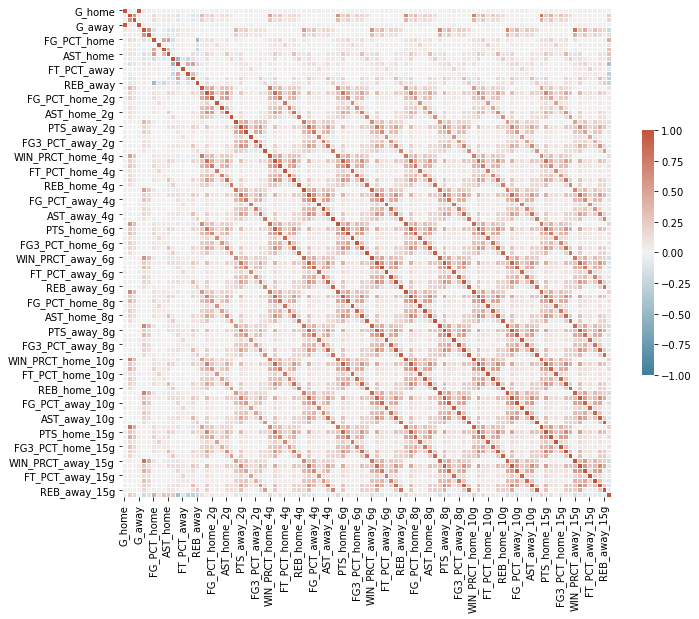

In [71]:
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1, center=0, vmin=-1, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

---
### Plot for the pourcentage of chance that a team have if they play at home

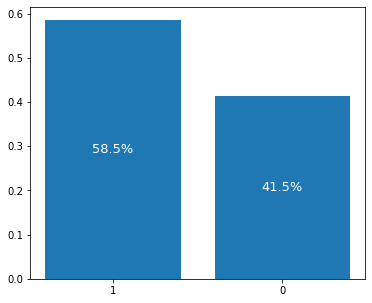

In [73]:
fig, ax = plt.subplots(figsize=(6,5))

v_c = games_formated['HOME_TEAM_WINS_x'].value_counts(normalize=True)
v_c.index = v_c.index.astype(str)

ax.bar(v_c.index, v_c.values)

for i in ax.patches:
    x, y = i.get_x(), i.get_y()
    w, h = i.get_width(), i.get_height()

    val = str(round(h*100,1)) + '%' 

    ax.text(x + w/2, y + h/2, val,
            horizontalalignment='center', verticalalignment='center',
            fontsize=13, color='white')

plt.show()

---